# Importing Dataset

In [88]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [89]:
data=pd.read_csv(r'D:\Data Set\Bengaluru_House_Data.csv')


In [90]:
pd.set_option("display.max_rows",None)
pd.set_option("display.max_columns",None)

# Read the data 

In [91]:
dc=pd.read_csv(r'D:\Data Set\Bengaluru_House_Data.csv')


In [92]:
for i in data.columns:
    a=data[i].unique()
    print(f"{i}:  {a} \n\n")
  
    


area_type:  ['Super built-up  Area' 'Plot  Area' 'Built-up  Area' 'Carpet  Area'] 


availability:  ['19-Dec' 'Ready To Move' '18-May' '18-Feb' '18-Nov' '20-Dec' '17-Oct'
 '21-Dec' '19-Sep' '20-Sep' '18-Mar' '20-Feb' '18-Apr' '20-Aug' '18-Oct'
 '19-Mar' '17-Sep' '18-Dec' '17-Aug' '19-Apr' '18-Jun' '22-Dec' '22-Jan'
 '18-Aug' '19-Jan' '17-Jul' '18-Jul' '21-Jun' '20-May' '19-Aug' '18-Sep'
 '17-May' '17-Jun' '21-May' '18-Jan' '20-Mar' '17-Dec' '16-Mar' '19-Jun'
 '22-Jun' '19-Jul' '21-Feb' 'Immediate Possession' '19-May' '17-Nov'
 '20-Oct' '20-Jun' '19-Feb' '21-Oct' '21-Jan' '17-Mar' '17-Apr' '22-May'
 '19-Oct' '21-Jul' '21-Nov' '21-Mar' '16-Dec' '22-Mar' '20-Jan' '21-Sep'
 '21-Aug' '14-Nov' '19-Nov' '15-Nov' '16-Jul' '15-Jun' '17-Feb' '20-Nov'
 '20-Jul' '16-Sep' '15-Oct' '15-Dec' '16-Oct' '22-Nov' '15-Aug' '17-Jan'
 '16-Nov' '20-Apr' '16-Jan' '14-Jul'] 


location:  ['Electronic City Phase II' 'Chikka Tirupathi' 'Uttarahalli' ...
 '12th cross srinivas nagar banshankari 3rd stage' 'Havanur

In [93]:
data.shape

(13320, 9)

In [94]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [95]:
data.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

<Axes: >

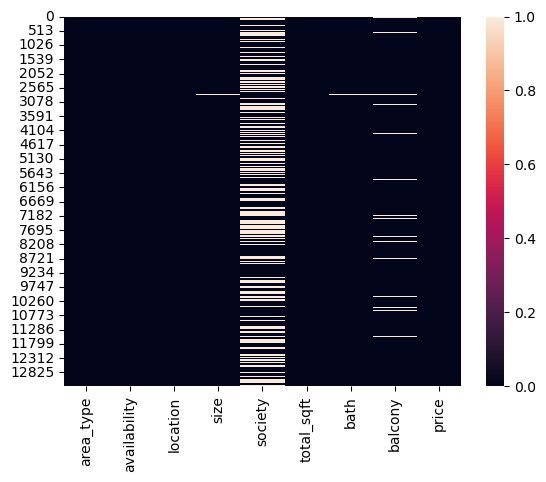

In [96]:
plt.plot(figsize=(10,10))
sns.heatmap(data.isnull())

# Imputing Cat Var

In [97]:
c_columns=data.select_dtypes(include='object')
c_columns.keys()

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft'],
      dtype='object')

In [98]:
percent=c_columns.isnull().sum() / c_columns.shape[0] * 100
percent

area_type        0.000000
availability     0.000000
location         0.007508
size             0.120120
society         41.306306
total_sqft       0.000000
dtype: float64

In [99]:
data['society'].fillna(data['society'].mode()[0],inplace=True)

In [100]:
data.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,GrrvaGr,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,GrrvaGr,1200,2.0,1.0,51.00


# Impute  Numerical val

In [101]:
n_columns=data.select_dtypes(include=('int','float'))
n_columns.keys()

Index(['bath', 'balcony', 'price'], dtype='object')

In [102]:
n_columns.isnull().sum()/n_columns.shape[0]*100

bath       0.548048
balcony    4.572072
price      0.000000
dtype: float64

# Drop rows as less data is missing

In [103]:
data=data.dropna()

<Axes: >

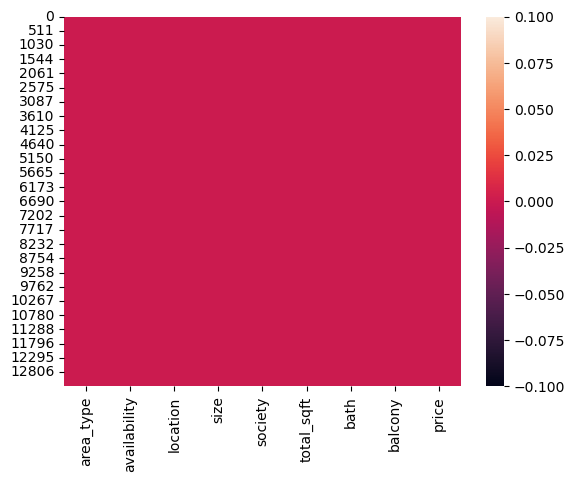

In [104]:
plt.plot(figsize=(10,10))
sns.heatmap(data.isnull())

In [105]:
data.isnull().sum()

area_type       0
availability    0
location        0
size            0
society         0
total_sqft      0
bath            0
balcony         0
price           0
dtype: int64

In [106]:
data=data.drop(columns='availability')


# Feature Engineering

In [107]:
data.head()

,area_type,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Uttarahalli,3 BHK,GrrvaGr,1440,2.0,3.0,62.00
3,Super built-up Area,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Kothanur,2 BHK,GrrvaGr,1200,2.0,1.0,51.00


In [108]:
data['area_type'].unique()

array(['Super built-up  Area', 'Plot  Area', 'Built-up  Area',
       'Carpet  Area'], dtype=object)

In [109]:
label={'Super built-up  Area':2 , 'Plot  Area':1, 'Built-up  Area':3,
       'Carpet  Area':4}

In [110]:
data['Area Type']=data['area_type'].map(label)

In [111]:
data=data.drop(columns='area_type')

In [112]:
from sklearn.preprocessing import LabelEncoder

In [113]:
LE=LabelEncoder()

In [114]:
data['Location']=LE.fit_transform(data['location'])
data['Society']=LE.fit_transform(data['society'])
data['Size']=LE.fit_transform(data['size'])

In [115]:
d=['location','size','society']
data.drop(columns=d,inplace=True)
data.head()

,total_sqft,bath,balcony,price,Area Type,Location,Society,Size
0,1056,2.0,1.0,39.07,2,407,443,9
1,2600,5.0,3.0,120.00,1,306,2353,15
2,1440,2.0,3.0,62.00,3,1141,777,12
3,1521,3.0,1.0,95.00,2,738,2109,12
4,1200,2.0,1.0,51.00,2,697,777,9


In [116]:
#to check catagorical value in numeric value
c_var=data.select_dtypes(include=('object'))
c_var.keys()


Index(['total_sqft'], dtype='object')

In [117]:
#accessing string val
string_val = data[~data['total_sqft'].str.isnumeric()]

# Replace rows containing string values with NaN
data.loc[string_val.index, 'total_sqft'] = np.nan

In [118]:
data=data.dropna()


In [119]:
#changing the datatype of a column
data['total_sqft'] = data['total_sqft'].astype(int)


# Plotting the correaltions

In [120]:
data.describe()

,total_sqft,bath,balcony,price,Area Type,Location,Society,Size
count,12438.000000,12438.000000,12438.000000,12438.000000,12438.000000,12438.000000,12438.000000,12438.000000
mean,1509.329635,2.613925,1.604277,105.879403,2.048400,653.149059,1085.595514,10.871603
std,1165.372867,1.220291,0.804039,132.271685,0.590241,353.883594,602.201974,3.696602
min,5.000000,1.000000,0.000000,8.000000,1.000000,0.000000,0.000000,0.000000
25%,1100.000000,2.000000,1.000000,49.342500,2.000000,387.000000,777.000000,9.000000
50%,1260.000000,2.000000,2.000000,70.000000,2.000000,637.000000,777.000000,12.000000
75%,1636.000000,3.000000,2.000000,114.000000,2.000000,970.000000,1523.000000,12.000000
max,52272.000000,40.000000,3.000000,2912.000000,4.000000,1264.000000,2591.000000,26.000000


<Axes: >

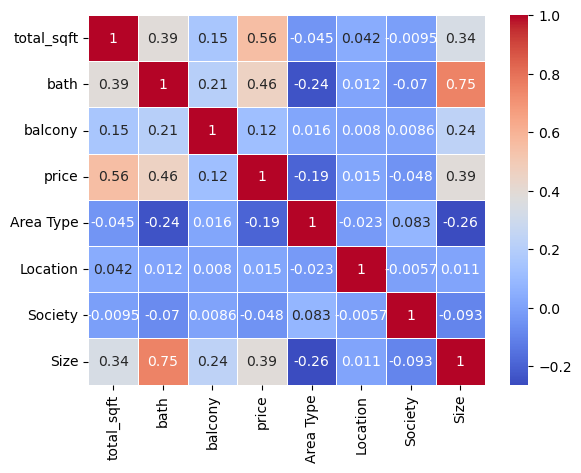

In [121]:
corr=data.corr()

sns.heatmap(corr,annot=True, cmap='coolwarm', linewidths=0.5)

<Axes: xlabel='total_sqft', ylabel='price'>

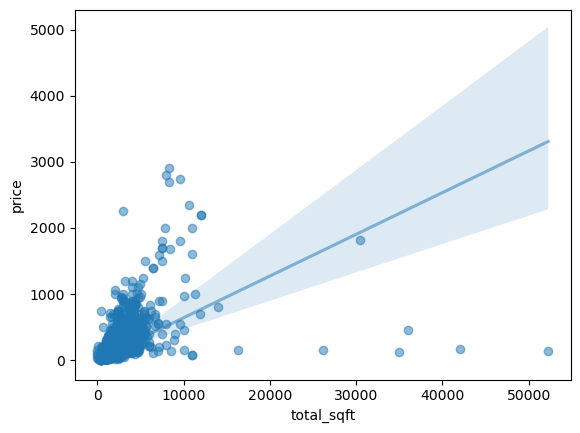

In [122]:

sns.regplot(x='total_sqft',y='price',data=data, scatter_kws={'alpha':0.5}, line_kws={'alpha':0.5})
#plt.xlim(0,15)
#plt.ylim(0,1500)
  # Set x-axis limits


(0.0, 15.0)

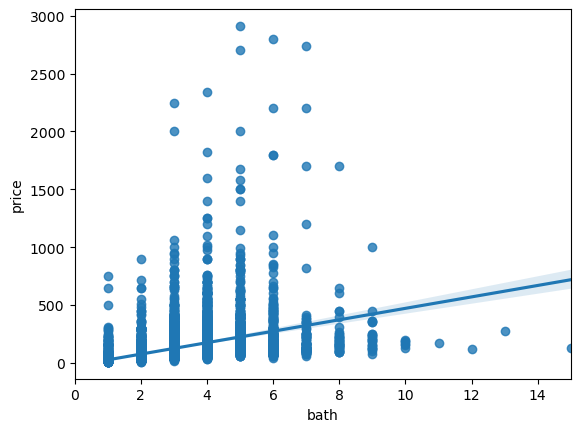

In [123]:
sns.regplot(data=data,x='bath',y='price')
plt.xlim(0,15)
#plt.ylim(0,1500)

# Removing Outliers

<Axes: >

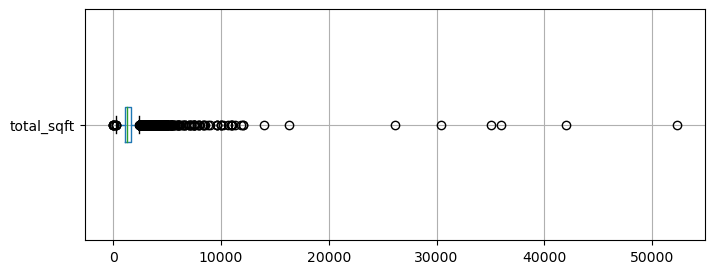

In [124]:
data.boxplot(['total_sqft'],figsize=(8,3),vert=False)


In [125]:
data.sort_values(by=['total_sqft'],ascending=False).head()

,total_sqft,bath,balcony,price,Area Type,Location,Society,Size
1894,52272,2.0,1.0,140.0,1,856,777,13
5393,42000,8.0,3.0,175.0,2,376,777,25
5469,36000,4.0,2.0,450.0,2,1138,1709,14
674,35000,3.0,3.0,130.0,3,1222,599,12
12987,30400,4.0,2.0,1824.0,1,385,777,20


<Axes: >

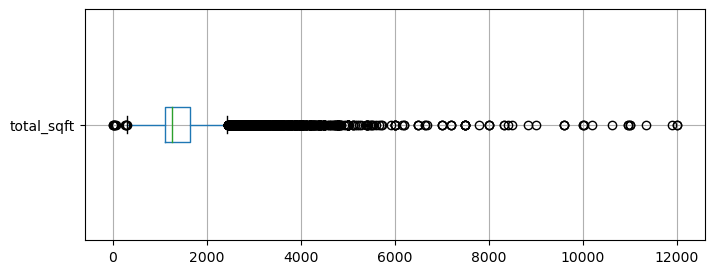

In [126]:
#outlier filter
outlier_filter=data['total_sqft'] < 12500
data=data[outlier_filter]
data.boxplot(['total_sqft'],figsize=(8,3),vert=False)

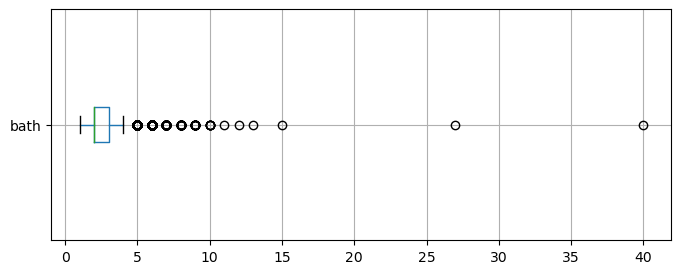

In [127]:
b=data.boxplot('bath',vert=False,figsize=(8,3))

In [128]:
outlier=data['bath']<12
data=data[outlier]

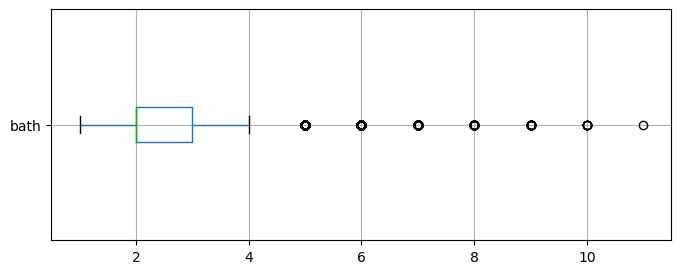

In [129]:
b=data.boxplot('bath',vert=False,figsize=(8,3))

# Splitting the data

In [130]:
from sklearn.model_selection import train_test_split

In [131]:
independent=['total_sqft','bath']
dependent=['price']

In [132]:
x=data[independent].values
y=data[dependent].values

In [133]:
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.2,random_state=49)

In [134]:
X_train.shape


(9940, 2)

In [135]:
Y_test.shape

(2485, 1)

# Feature scaling

In [136]:
from sklearn.preprocessing import MinMaxScaler

In [137]:
sc=MinMaxScaler()

In [138]:
sc.fit(X_train)

MinMaxScaler()

In [139]:
X_train

array([[1.095e+03, 2.000e+00],
       [1.063e+03, 2.000e+00],
       [1.260e+03, 2.000e+00],
       ...,
       [1.260e+03, 1.000e+00],
       [1.280e+03, 3.000e+00],
       [9.500e+02, 2.000e+00]])

In [140]:
X_train=sc.transform(X_train)

In [141]:
X_train

array([[0.0908712 , 0.1       ],
       [0.08820342, 0.1       ],
       [0.10462693, 0.1       ],
       ...,
       [0.10462693, 0.        ],
       [0.10629429, 0.2       ],
       [0.07878283, 0.1       ]])

In [142]:
X_train=pd.DataFrame(X_train,columns=['total_sqft', 'bath'])

In [143]:
data=X_train.describe().round(2)
data

,total_sqft,bath
count,9940.00,9940.00
mean,0.12,0.16
std,0.07,0.11
min,0.00,0.00
25%,0.09,0.10
50%,0.10,0.10
75%,0.13,0.20
max,1.00,1.00


In [144]:
Y_train=sc.fit_transform(Y_train)

In [145]:
Y_train=pd.DataFrame(Y_train,columns=['price'])
Y_train.head()

,price
0,0.011019
1,0.018309
2,0.012741
3,0.025826
4,0.030992


# Fitting a Model

In [146]:
# Creating a regression model to predict the aggregate rating of a restaurant based on available features
# Import necessary libraries for data splitting, regression, and evaluation
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import AdaBoostRegressor
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn import svm

In [147]:
# Experimenting with different algorithms (e.g., linear regression, decision trees, random forest)
# And compare their performance by evaluating the model's performance using appropriate metrics

# Define a dictionary of regression models to experiment with
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    'Ada Boost':AdaBoostRegressor(n_estimators=50, base_estimator=DecisionTreeRegressor(),learning_rate=1),
    'xgboost ':XGBRegressor(max_depth=3, learning_rate=0.1, n_estimators=500, objective='reg:linear', booster='gbtree'),
    'KNN':KNeighborsRegressor(),
    'SVM': svm.SVR(C=2, kernel='linear')
}

# Iterate through each model, train, evaluate, and print results
for model_name, model in models.items():
    # Train the model on the training data
    model.fit(X_train, Y_train)

    # Make predictions on the test data
    Y_pred = model.predict(X_test)
    
    # Calculate Mean Squared Error (MSE) to evaluate model accuracy
    mse = mean_squared_error(Y_test, Y_pred)
    
     # Calculate R-squared (R2) to assess the goodness of fit
    r2 = r2_score(Y_test, Y_pred)

    #Accuracy
    a=model.score(X_train,Y_train)*100

    # Print model performance metrics
    print(f"Model: {model_name}")
    print(f"Accuracy:{a}")
    #print(f"Mean Squared Error: {mse}")
   #print(f"R-squared: {r2}")
    print("-"*20)
    
    

C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Model: Linear Regression
Accuracy:54.492377810968605
--------------------
Model: Decision Tree
Accuracy:87.25831769085542
--------------------


C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Model: Random Forest
Accuracy:83.57102343559022
--------------------


C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but AdaBoostRegressor was fitted with feature names
  warnings.warn(
C:\Users\Admin\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [16:14:33] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


Model: Ada Boost
Accuracy:73.91895177654179
--------------------
Model: xgboost 
Accuracy:65.3065056316829
--------------------
Model: KNN
Accuracy:68.462924031091
--------------------


C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Model: SVM
Accuracy:-133.1901158047005
--------------------


C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(


In [148]:
#checking
LR=LinearRegression()
DT=DecisionTreeRegressor()
RF=RandomForestRegressor()

LR.fit(X_train, Y_train)
DT.fit(X_train, Y_train)
RF.fit(X_train, Y_train)

LR_pred = LR.predict(X_train)
DT_pred =DT.predict(X_train)
RF_pred = RF.predict(X_train)

TestingDataResults=pd.DataFrame(data=X_train, columns=['total_sqft','bath'])
TestingDataResults['price']=Y_train
TestingDataResults["LR"]=LR_pred
TestingDataResults["DT"]=DT_pred
TestingDataResults["RF"]=RF_pred
TestingDataResults.head()

C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


,total_sqft,bath,price,LR,DT,RF
0,0.090871,0.1,0.011019,0.016247,0.012728,0.012837
1,0.088203,0.1,0.018309,0.015038,0.011213,0.011178
2,0.104627,0.1,0.012741,0.022478,0.020991,0.021032
3,0.100959,0.1,0.025826,0.020816,0.023677,0.023686
4,0.148729,0.2,0.030992,0.046824,0.027032,0.028414
